# Machine Learning with scikit-learn

* What is Machine Learning?
  * Types of Machine Learning
* Train-Test split
* Use `sklearn` to build linear regression model
* One-Hot Encoding
* Pipelines
* Evaluation Metrics

We will be referencing the [scikit-learn docs](https://scikit-learn.org/stable/user_guide.html) and [pandas docs](https://pandas.pydata.org/pandas-docs/stable/index.html) where relevant, and will be analyzing data from the New York Times COVID-19 US States dataset from https://github.com/nytimes/covid-19-data

**Disclaimer: Linear regression is not the most suitable algorithm for this dataset, but we are using it to illustrate how to use scikit-learn**

## What is Machine Learning?

* Learning patterns in your data without being explicitly programmed
* A function that maps features to an output

![](https://brookewenig.com/img/DL/al_ml_dl.png)

-sandbox
## Types of Machine Learning
* Supervised Learning
  * Regression <img src="https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png" style="height: 250px; padding: 10px"/>
  * Classification
    <img src="https://cdn3-www.dogtime.com/assets/uploads/2018/10/puppies-cover.jpg" style="height: 250px; padding: 10px"/>
    <img src="https://images.unsplash.com/photo-1529778873920-4da4926a72c2?ixlib=rb-1.2.1&w=1000&q=80" style="height: 250px; padding: 10px"/>
* Unsupervised Learning
<img src="https://www.iotforall.com/wp-content/uploads/2018/01/Screen-Shot-2018-01-17-at-8.10.14-PM.png" style="height: 250px; padding: 10px"/>
* Reinforcement Learning
<img src="https://brookewenig.com/img/ReinforcementLearning/Rl_agent.png" style="height: 250px; padding: 10px"/>

Today we're going to start simple and focus on a supervised learning (regression) problem. Here we will use a linear regression model to predict the number of deaths resulting from COVID-19.

In [0]:
%fs ls databricks-datasets/COVID/covid-19-data/

path,name,size
dbfs:/databricks-datasets/COVID/covid-19-data/.git/,.git/,0
dbfs:/databricks-datasets/COVID/covid-19-data/.github/,.github/,0
dbfs:/databricks-datasets/COVID/covid-19-data/.gitignore,.gitignore,10
dbfs:/databricks-datasets/COVID/covid-19-data/LICENSE,LICENSE,1289
dbfs:/databricks-datasets/COVID/covid-19-data/NEW-YORK-DEATHS-METHODOLOGY.md,NEW-YORK-DEATHS-METHODOLOGY.md,2771
dbfs:/databricks-datasets/COVID/covid-19-data/NYT-readme.md,NYT-readme.md,1748
dbfs:/databricks-datasets/COVID/covid-19-data/PROBABLE-CASES-NOTE.md,PROBABLE-CASES-NOTE.md,3162
dbfs:/databricks-datasets/COVID/covid-19-data/README.md,README.md,22959
dbfs:/databricks-datasets/COVID/covid-19-data/colleges/,colleges/,0
dbfs:/databricks-datasets/COVID/covid-19-data/excess-deaths/,excess-deaths/,0


## Start machine learning wiht scikit-learn

In [0]:
import pandas as pd

df = pd.read_csv("/dbfs/databricks-datasets/COVID/covid-19-data/us-states.csv")
df.head()


Out[38]:

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [0]:
df.columns

Out[13]: Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [0]:
df.date.max()

Out[16]: '2020-09-27'

In [0]:
df.shape

Out[39]: (20584, 5)

## Relationship between Cases & Deaths

In [0]:
# To allow us to print out plots
%matplotlib inline

## show relationship between cases and deaths by state for a particular day

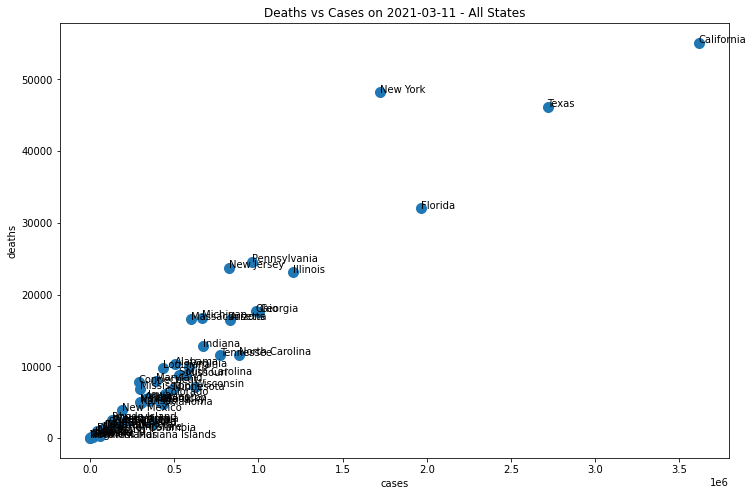

In [0]:
# Filter to most current date
import matplotlib as mpl
import matplotlib.pyplot as plt

max=df.date.max()

df_max = df[df["date"] == max]

ax = df_max.plot(x="cases", y="deaths", kind="scatter", 
                   figsize=(12,8), s=100, title="Deaths vs Cases on "+current+" - All States")

df_current[["cases", "deaths", "state"]].apply(lambda row: ax.text(*row), axis=1);

## New York, Florida, Texas and California are Outliers

In [0]:
# Filter to states that are NOT New York, Florida, Texas and California
not_outliers = df[(df["state"] != "New York") & (df["state"] != "Florida") & (df["state"] != "Texas") & (df["state"] != "California")]
not_outliers.head()

Out[48]:

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


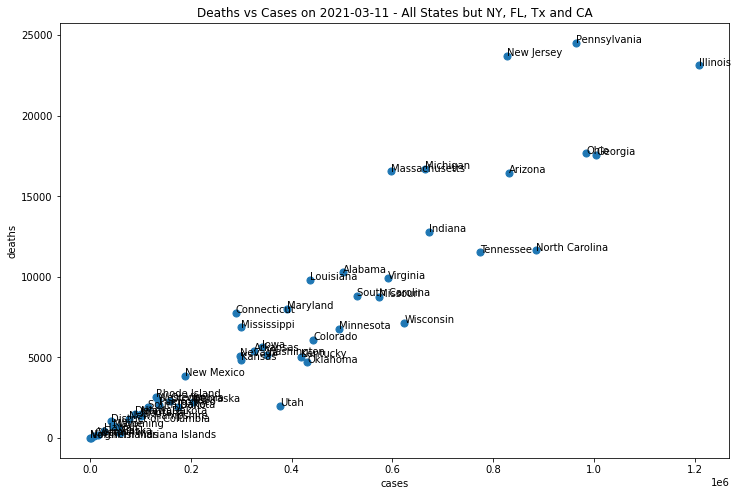

In [0]:
# Filter to most current day

current=df.date.max()

not_outliers_current = not_outliers[not_outliers["date"] == current]

ax = not_outliers_current.plot(x="cases", y="deaths", kind="scatter", 
                   figsize=(12,8), s=50, title="Deaths vs Cases on "+current+" - All States but NY, FL, Tx and CA")

not_outliers_current[["cases", "deaths", "state"]].apply(lambda row: ax.text(*row), axis=1);

## COVID-19 deaths comparison among selected states

In [0]:
df_selected_states = df[(df["state"] == "New York") | (df["state"] == "Florida") |(df["state"] == "Texas") | (df["state"] == "California") |(df["state"] == "New Jersey")]

# Let's pivot our DataFrame so that we can plot deaths over time for those states
df_pivot = df_selected_states.pivot(index='date', columns='state', values='deaths').fillna(0)
df_pivot

Out[52]:

state,California,Florida,New Jersey,New York,Texas
date,,,,,
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-03-07,54217.0,31682.0,23574.0,47857.0,45446.0
2021-03-08,54377.0,31763.0,23590.0,47921.0,45570.0
2021-03-09,54620.0,31888.0,23635.0,48000.0,45754.0


Out[53]:

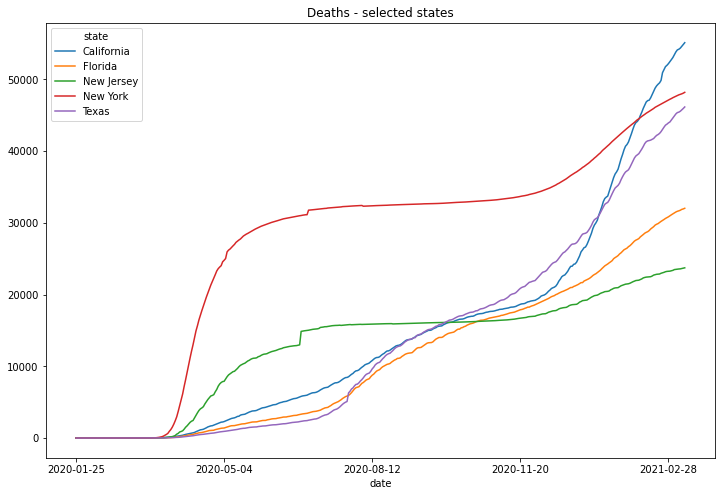

<AxesSubplot:title={'center':'Deaths - selected states'}, xlabel='date'>

In [0]:
df_pivot.plot.line(title="Deaths - selected states", figsize=(12,8))

## Train-Test Split

![](https://brookewenig.com/img/IntroML/trainTest.png)

Because this is temporal data, instead of doing a random split, we will use data from March 1 to August 31 to train our model, and test our model by predicting values for September 1 to current day.

In [0]:
train_df = df[(df["date"] >= "2020-03-01") & (df["date"] <= "2020-08-31")]
test_df = df[df["date"] > "2020-09-01"]

X_train = train_df[["cases"]]
y_train = train_df["deaths"]

X_test = test_df[["cases"]]
y_test = test_df["deaths"]

## Linear Regression

* Goal: Find the line of best fit
$$\hat{y} = w_0 + w_1x$$

$$\{y} ≈ \hat{y} + ϵ$$
* *x*: feature
* *y*: label

![](https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png)

Here we will be fitting a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model from scikit-learn.

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(f"num_deaths = {lr.intercept_:.4f} + {lr.coef_[0]:.4f}*cases")

num_deaths = 111.2663 + 0.0383*cases

Hmmm... if we have no cases, then there should be no deaths caused by COVID-19, so let's set the intercept to be 0.

In [0]:
lr = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(f"num_deaths = {lr.coef_[0]:.4f}*cases")

num_deaths = 0.0388*cases

So this model is implying that there is a 3.9% mortality rate in our dataset. But we know that some states have higher mortality rates than others. Let's include the state as a feature!

## One-Hot Encoding
How do we handle non-numeric features, such as the state?

One idea:
* Create single numerical feature to represent non-numeric one
* Categorical features:
  * state = {'New York', 'California', 'Louisiana'}
  * 'New York' = 1, 'California' = 2, 'Louisiana' = 3
  
BUT this implies California is 2x New York!

Better idea:
* Create a ‘dummy’ feature for each category
* 'New York' => [1, 0, 0], 'California' => [0, 1, 0], 'Louisiana' => [0, 0, 1]

This technique is known as ["One Hot Encoding"](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [0]:
from sklearn.preprocessing import OneHotEncoder

X_train = train_df[["cases", "state"]]
X_test = test_df[["cases", "state"]]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(X_train).transform(X_train)

Out[57]: array([[1., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 1., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 1., 0., 0.],
 [0., 0., 0., ..., 0., 1., 0.],
 [0., 0., 0., ..., 0., 0., 1.]])

Let's check the shape

In [0]:
enc.fit(X_train).transform(X_train).shape

Out[58]: (9784, 7802)

Yikes! It one-hot encoded the cases variable too

In [0]:
enc.categories_

Out[59]: [array([ 1, 2, 3, ..., 702499, 706589, 712541]),
 array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
 'North Carolina', 'North Dakota', 'Northern Mariana Islands',
 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
 dtype=object)]

We need the [column transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to only apply the one hot encoding to a single column.

In [0]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("enc", enc, ["state"])], remainder="passthrough")
ct.fit_transform(X_train).shape

Out[60]: (9784, 56)

## Pipelines

We can chain together a series of data transformations with a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). This way we also ensure that whatever operations we apply to our training set, we also apply in the same order to our test set.

In [0]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[("ct", ct), ("lr", lr)])
pipeline_model = pipeline.fit(X_train, y_train)

y_pred = pipeline_model.predict(X_test)

## How are the different states performing?

You'll notice that by adding in additional features, our coefficient for our cases feature changed as well.

In [0]:
print(f"num_deaths = {pipeline_model.steps[1][1].coef_[-1]:.4f}*cases + state_coef")

num_deaths = 0.0280*cases + state_coef

In [0]:
pipeline_model.steps[1][1].coef_[:-1]

Out[63]: array([-2.58576860e+02, -3.12776299e+01, -2.86706959e+02, -2.87305631e+02,
 -1.19090406e+03, 4.31333314e+02, 2.04345961e+03, 8.99038365e+01,
 1.59154892e+02, -1.56504171e+03, -4.65459557e+01, -2.44820462e+01,
 -2.19487681e+01, -1.37072167e+02, 1.60827363e+03, 7.77313125e+02,
 -1.49148359e+02, -1.65985348e+02, 1.70480389e+01, 9.50974454e+02,
 1.31745427e+01, 7.16652335e+02, 3.16569123e+03, 2.90679532e+03,
 1.77552623e+02, 1.39571405e+02, 8.17645143e+01, -1.86969460e+01,
 -2.02028831e+02, -9.98349507e+01, 1.15198613e+02, 6.23858686e+03,
 7.45066730e+01, 1.44512639e+04, -4.56670036e+02, -3.20115571e+01,
 1.11041789e+00, 7.51774365e+02, -1.03306003e+02, -5.31592775e+01,
 2.52664115e+03, -8.77333522e+01, 2.50221043e+02, -2.06696472e+02,
 -7.56108582e+01, -7.03256066e+02, -1.77791065e+03, -3.45592498e+02,
 1.70958770e+01, -7.72007133e-01, -8.35953978e+01, 2.13877101e+02,
 -1.32533588e+01, -1.89187901e+02, -2.25561799e+01])

In [0]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

categories = pipeline_model.steps[0][1].transformers[0][1].categories_[1]

pd.DataFrame(zip(categories, pipeline_model.steps[1][1].coef_[:-1]), columns=["State", "Coefficient"])

Out[64]:

,State,Coefficient
0,Alabama,-258.58
1,Alaska,-31.28
2,Arizona,-286.71
3,Arkansas,-287.31
4,California,-1190.90
5,Colorado,431.33
6,Connecticut,2043.46
7,Delaware,89.90
8,District of Columbia,159.15
9,Florida,-1565.04


## Evaluation Metrics

![](https://brookewenig.com/img/IntroML/RMSE.png)

Let's compute the MSE and RMSE for our dataset using the [sklearn.metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error).

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE is {mse:.1f}, RMSE is {rmse:.1f}")

MSE is 2608971.8, RMSE is 1615.2

## Visualize Predictions

In [0]:
pred = pd.concat([test_df.reset_index(drop=True), pd.DataFrame(y_pred, columns=["predicted_deaths"])], axis=1)
pred

Out[65]:

,date,state,fips,cases,deaths,predicted_deaths
0,2020-09-02,Alabama,1,128239,2217,3328.93
1,2020-09-02,Alaska,2,6181,36,141.64
2,2020-09-02,Arizona,4,202898,5070,5389.40
3,2020-09-02,Arkansas,5,62112,841,1450.29
4,2020-09-02,California,6,722035,13330,19008.14
...,...,...,...,...,...,...
10500,2021-03-11,Virginia,51,590625,9902,16439.23
10501,2021-03-11,Washington,53,350661,5167,10023.67
10502,2021-03-11,West Virginia,54,134496,2338,3749.29
10503,2021-03-11,Wisconsin,55,623801,7162,17261.74


Out[68]:

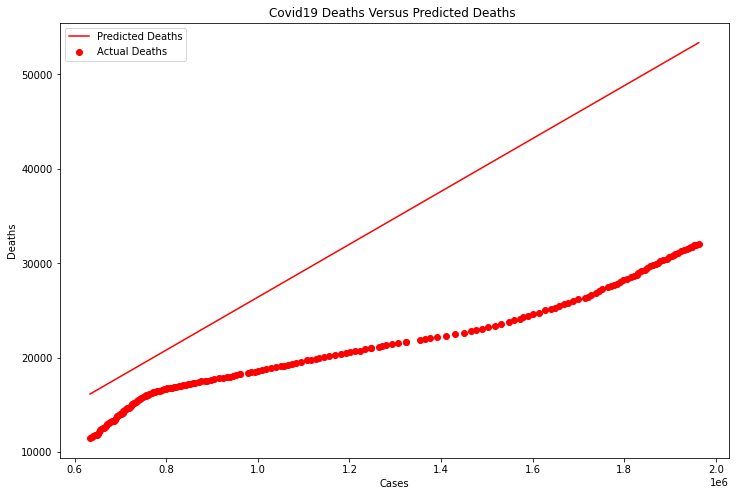

<matplotlib.legend.Legend at 0x7f46f632a400>

In [0]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,8))

pred_ri=pred[pred['state']=='Florida']

x=pred_ri['cases']
y=pred_ri['deaths']
y_pred=pred_ri['predicted_deaths']

plt.scatter(x,y, color='red', label="Actual Deaths")
plt.plot(x, y_pred, linestyle='-', color='red', label="Predicted Deaths")

plt.title('Covid19 Deaths Versus Predicted Deaths ')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()


Voila! You have successfully built a machine learning pipeline using scikit-learn!

To keep exploring with scikit-learn, checkout the datasets at [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php) and [Kaggle](https://www.kaggle.com/)!